In [1]:
import requests
import pandas as pd

Importing the 311 and Crime Incident data using a parameter dictionary to limit what exactly is pulled in,
as well as using the direct API link from the data source to request the data in

In [2]:
params_dict = {
    '$where':'date_extract_y(open_date)>2021' and 'date_extract_y(open_date)<2023',
    '$limit':50000
}

uri = 'https://data.buffalony.gov/resource/whkc-e5vr.json'

r =requests.get(uri,params=params_dict)
print('Status code:',r.status_code)
print('Number of rows returned:',len(r.json()))
print('Endoced URI with params:',r.url)

Status code: 200
Number of rows returned: 50000
Endoced URI with params: https://data.buffalony.gov/resource/whkc-e5vr.json?%24where=date_extract_y%28open_date%29%3C2023&%24limit=50000


In [3]:
ServiceRequests=pd.DataFrame(r.json())
print(ServiceRequests.shape)
ServiceRequests.head()

(50000, 33)


case_reference                open_date              closed_date  status  \
0     1001721108  2022-10-26T10:36:00.000  2023-01-04T08:13:00.000  Closed   
1     1001758333  2022-12-28T13:23:00.000  2023-01-06T10:26:00.000  Closed   
2     1001756171  2022-12-26T15:04:00.000  2023-01-06T17:10:00.000  Closed   
3     1001756978  2022-12-27T12:02:00.000  2023-01-06T16:49:00.000  Closed   
4     1001339938  2021-02-09T14:36:00.000  2023-01-02T17:20:00.000  Closed   

                subject                 reason  \
0  Dept of Public Works    Rodent_Pest Control   
1  Dept of Public Works                Streets   
2  Dept of Public Works                Streets   
3  Dept of Public Works                Streets   
4  Dept of Public Works  Engineering - Traffic   

                             type object_type address_number address_line_1  \
0              Rodents (Req_Serv)    Property            716        ELMWOOD   
1  Street Snow Plowing (Req_Serv)    Property             31        PAVONIA   
2  Street Snow Plowing (Req_Serv)    Property             44          MYERS   
3  Street Snow Plowing (Req_Serv)    Property            235        SHERMAN   
4     Sign Maintenance (Req_Serv)    Property   INTERSECTION     Forest Ave   

   ...  x_coordinate  y_coordinate census_tract_2010 census_block_group_2010  \
0  ...  -8780598.628  5299287.2139             65.01                       1   
1  ...  -8781630.868  5303611.6111                56                       3   
2  ...  -8776513.276  5297238.4857               166                       2   
3  ...  -8777167.282  5295234.3467                15                       2   
4  ...     1072174.2     1066985.6                53                       2   

  census_block_2010 tractce20 geoid20_tract geoid20_blockgroup  \
0              1006    006501   36029006501       360290065011   
1              3003    005600   36029005600       360290056003   
2              2001    016600   36029016600       360290166002   
3              2002    001500   36029001500       360290015002   
4              2006    005300   36029005300       360290053002   

     geoid20_block address_line_2  
0  360290065011006            NaN  
1  360290056003002            NaN  
2  360290166002001            NaN  
3  360290015002002            NaN  
4  360290053002003   Delaware Ave  

[5 rows x 33 columns]

In [4]:
params_dict2 = {
    '$where':'date_extract_y(incident_datetime)>2022' and 'date_extract_y(incident_datetime)<2023',
    '$limit':50000
}

uri2 = 'https://data.buffalony.gov/resource/d6g9-xbgu.json'

r2 =requests.get(uri2,params=params_dict2)
print('Status code:',r2.status_code)
print('Number of rows returned:',len(r2.json()))
print('Endoced URI with params:',r2.url)

Status code: 200
Number of rows returned: 50000
Endoced URI with params: https://data.buffalony.gov/resource/d6g9-xbgu.json?%24where=date_extract_y%28incident_datetime%29%3C2023&%24limit=50000


In [5]:
CrimeIncidents=pd.DataFrame(r2.json())
print(CrimeIncidents.shape)
CrimeIncidents.head()

(50000, 27)


case_number        incident_datetime incident_type_primary  \
0  06-3340582  2006-11-30T03:30:00.000         LARCENY/THEFT   
1  17-0810114  2017-03-22T06:08:00.000               ASSAULT   
2  14-3550267  2014-12-20T06:00:00.000                   UUV   
3  16-2290180  2016-08-15T06:00:00.000         LARCENY/THEFT   
4  17-1890428  2017-04-01T12:00:00.000         LARCENY/THEFT   

                                incident_description parent_incident_type  \
0  Buffalo Police are investigating this report o...                Theft   
1                                            ASSAULT              Assault   
2                                                UUV     Theft of Vehicle   
3                                      LARCENY/THEFT                Theft   
4                                      LARCENY/THEFT                Theft   

  hour_of_day day_of_week                address_1     city state  ...  \
0           3    Thursday         1 Block EDSON AV  Buffalo    NY  ...   
1           6   Wednesday  MICHIGAN AV & CHERRY ST  Buffalo    NY  ...   
2           6    Saturday     100 Block FLORIDA ST  Buffalo    NY  ...   
3           6      Monday      900 Block HERTEL AV  Buffalo    NY  ...   
4          12    Saturday      1 Block CORNWALL AV  Buffalo    NY  ...   

  census_tract census_block census_block_group   neighborhood_1  \
0      UNKNOWN      UNKNOWN            UNKNOWN          UNKNOWN   
1          165         2000                  2          Central   
2       168.02         1003                  1      Masten Park   
3           50         1005                  1       North Park   
4           36         4008                  4  Genesee-Moselle   

  police_district council_district tractce20 geoid20_tract geoid20_blockgroup  \
0         UNKNOWN            SOUTH   UNKNOWN       UNKNOWN            UNKNOWN   
1      District B         ELLICOTT    016500   36029016500       360290001102   
2      District E           MASTEN    016802   36029016802       360290001101   
3      District D            NORTH    005000   36029005000       360290001101   
4      District E           MASTEN    003600   36029003600       360290002004   

     geoid20_block  
0          UNKNOWN  
1  360290046012000  
2  360290035021003  
3  360290002001005  
4  360290031004008  

[5 rows x 27 columns]

In [6]:
ServiceRequests_2 = ServiceRequests[["open_date", "subject", "reason", "address_number", "address_line_1", "latitude", "longitude","neighborhood"]]
CrimeIncidents_2 = CrimeIncidents[["incident_datetime", "parent_incident_type", "day_of_week", "latitude", "longitude","neighborhood_1"]]

ServiceRequests_2.head()

open_date               subject                 reason  \
0  2022-10-26T10:36:00.000  Dept of Public Works    Rodent_Pest Control   
1  2022-12-28T13:23:00.000  Dept of Public Works                Streets   
2  2022-12-26T15:04:00.000  Dept of Public Works                Streets   
3  2022-12-27T12:02:00.000  Dept of Public Works                Streets   
4  2021-02-09T14:36:00.000  Dept of Public Works  Engineering - Traffic   

  address_number address_line_1            latitude           longitude  \
0            716        ELMWOOD   42.91660036619825   -78.8774555454645   
1             31        PAVONIA  42.945043024056545  -78.88672833645641   
2             44          MYERS   42.90312078148876  -78.84075625202563   
3            235        SHERMAN   42.88993171229306   -78.8466312637459   
4   INTERSECTION     Forest Ave  42.928058126915296  -78.86754509326569   

        neighborhood  
0    Elmwood Bidwell  
1        West Hertel  
2  Broadway Fillmore  
3  Broadway Fillmore  
4    Elmwood Bidwell

In [7]:
CrimeIncidents_2.head()

incident_datetime parent_incident_type day_of_week latitude  \
0  2006-11-30T03:30:00.000                Theft    Thursday   42.851   
1  2017-03-22T06:08:00.000              Assault   Wednesday   42.892   
2  2014-12-20T06:00:00.000     Theft of Vehicle    Saturday    42.92   
3  2016-08-15T06:00:00.000                Theft      Monday   42.947   
4  2017-04-01T12:00:00.000                Theft    Saturday   42.916   

  longitude   neighborhood_1  
0     -78.8          UNKNOWN  
1   -78.866          Central  
2   -78.855      Masten Park  
3   -78.874       North Park  
4   -78.821  Genesee-Moselle

I've decided to narrow down to these sets of data because I ultimately want to end up showing the relation ship
between 311 requests by neighborhood, compared to neighborhoods with varying crime rates

Limiting to this data are the only parts i see necessary to capture what I'm aiming to show

Checking for NAs 

In [8]:
total = ServiceRequests_2.isnull().sum().sort_values(ascending=False)
percent_1 = ServiceRequests_2.isnull().sum()/ServiceRequests_2.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

Total    %
address_number   4884  9.8
latitude         3833  7.7
longitude        3833  7.7
address_line_1    652  1.3
open_date           0  0.0
subject             0  0.0
reason              0  0.0
neighborhood        0  0.0

In [9]:
total = CrimeIncidents_2.isnull().sum().sort_values(ascending=False)
percent_1 = CrimeIncidents_2.isnull().sum()/CrimeIncidents_2.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

Total    %
latitude                878  1.8
longitude               878  1.8
neighborhood_1           44  0.1
incident_datetime         0  0.0
parent_incident_type      0  0.0
day_of_week               0  0.0

Since I'll be focusing more on the neighborhood level, for the service request/crime incident data I will leave the NAs alone for address however I will exclude the rows with NAs for Lat and Long as I don't want those to create problems for any map visuals later on

In [10]:
ServiceRequests_2 = ServiceRequests_2[ServiceRequests_2['latitude'].notna()]

In [11]:
ServiceRequests_2 = ServiceRequests_2[ServiceRequests_2['longitude'].notna()]

In [12]:
total = ServiceRequests_2.isnull().sum().sort_values(ascending=False)
percent_1 = ServiceRequests_2.isnull().sum()/ServiceRequests_2.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(10)

Total    %
address_number   1782  3.9
open_date           0  0.0
subject             0  0.0
reason              0  0.0
address_line_1      0  0.0
latitude            0  0.0
longitude           0  0.0
neighborhood        0  0.0

In [13]:
CrimeIncidents_2 = CrimeIncidents_2[CrimeIncidents_2['neighborhood_1'].notna()]

In [14]:
CrimeIncidents_2 = CrimeIncidents_2[CrimeIncidents_2['latitude'].notna()]

In [15]:
CrimeIncidents_2 = CrimeIncidents_2[CrimeIncidents_2['longitude'].notna()]

In [16]:
total = CrimeIncidents_2.isnull().sum().sort_values(ascending=False)
percent_1 = CrimeIncidents_2.isnull().sum()/CrimeIncidents_2.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

Total    %
incident_datetime         0  0.0
parent_incident_type      0  0.0
day_of_week               0  0.0
latitude                  0  0.0
longitude                 0  0.0
neighborhood_1            0  0.0

In [17]:
ServiceRequests_2['open_date'] = pd.to_datetime(ServiceRequests_2['open_date']).dt.date

ServiceRequests_2.head()

open_date               subject                 reason address_number  \
0  2022-10-26  Dept of Public Works    Rodent_Pest Control            716   
1  2022-12-28  Dept of Public Works                Streets             31   
2  2022-12-26  Dept of Public Works                Streets             44   
3  2022-12-27  Dept of Public Works                Streets            235   
4  2021-02-09  Dept of Public Works  Engineering - Traffic   INTERSECTION   

  address_line_1            latitude           longitude       neighborhood  
0        ELMWOOD   42.91660036619825   -78.8774555454645    Elmwood Bidwell  
1        PAVONIA  42.945043024056545  -78.88672833645641        West Hertel  
2          MYERS   42.90312078148876  -78.84075625202563  Broadway Fillmore  
3        SHERMAN   42.88993171229306   -78.8466312637459  Broadway Fillmore  
4     Forest Ave  42.928058126915296  -78.86754509326569    Elmwood Bidwell

In [18]:
CrimeIncidents_2['incident_datetime'] = pd.to_datetime(CrimeIncidents_2['incident_datetime']).dt.date

CrimeIncidents_2.head()

incident_datetime parent_incident_type day_of_week latitude longitude  \
0        2006-11-30                Theft    Thursday   42.851     -78.8   
1        2017-03-22              Assault   Wednesday   42.892   -78.866   
2        2014-12-20     Theft of Vehicle    Saturday    42.92   -78.855   
3        2016-08-15                Theft      Monday   42.947   -78.874   
4        2017-04-01                Theft    Saturday   42.916   -78.821   

    neighborhood_1  
0          UNKNOWN  
1          Central  
2      Masten Park  
3       North Park  
4  Genesee-Moselle

Upon further reflection I realized joining these tables together would come out messy seeing as they share no unique identifier to join on. Joining directly on neighborhood like i planned would only cause major duplicate and NA issues.

I'll continue with separate data sets, while still anylyzing them in tandem on the neighborhood level to see comparisons and trends

Looking to lessen the total amount of unique reasons, grouping those with lower counts against the total data set into Other

In [19]:
ServiceRequests_2['reason'].nunique()

40

In [20]:
reason_counts = ServiceRequests_2['reason'].value_counts(normalize=True)
reason_counts

Sanitation                                 0.248987
Housing                                    0.221327
Streets                                    0.151558
Engineering - Street Repairs               0.071891
Police                                     0.057444
Rodent_Pest Control                        0.045552
Parking Violations Bureau                  0.042714
Forestry                                   0.035913
Engineering - Traffic                      0.029653
National Grid                              0.020318
Animal Shelter                             0.018975
Buffalo Sewer Authority                    0.010982
Citizen Services - Graffiti                0.007495
Buffalo Water Authority                    0.005588
Citizen Services - Quick Response Teams    0.005372
City Parks                                 0.004592
BMHA                                       0.003682
Moving Violations                          0.003162
Rodent Control                             0.003032
Streets/Sani

In [21]:
other_list = list(reason_counts[reason_counts <= 0.02].index)

In [22]:
ServiceRequests_2['reason'].replace(other_list, 'Others', inplace=True)

<AxesSubplot:>

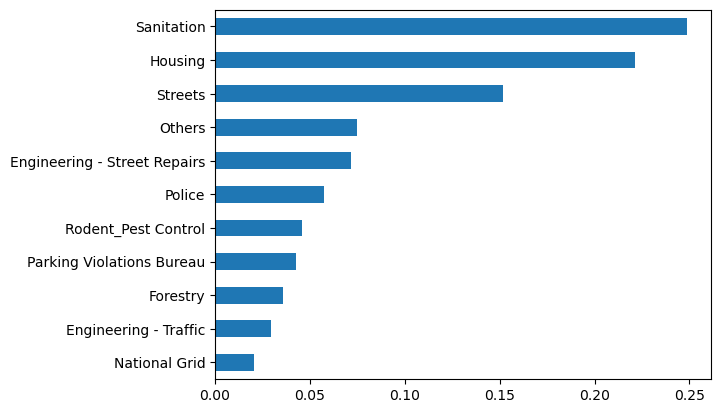

In [23]:
ServiceRequests_2['reason'].value_counts(normalize=True).sort_values(ascending=True).plot.barh()

Majortiy of the 311 Request data set is made up from calls on Sanitation Housing and Street/Street Repairs

<AxesSubplot:>

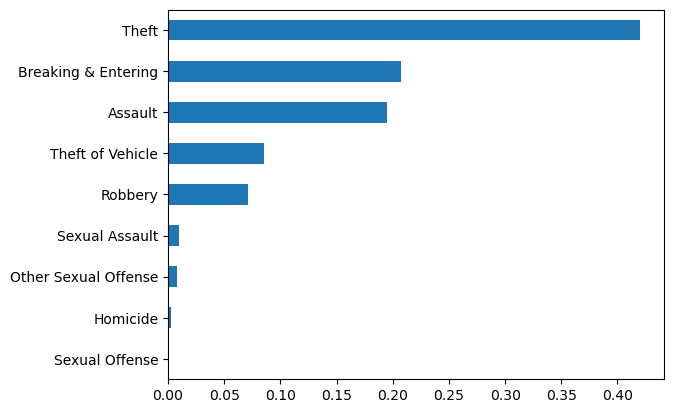

In [24]:
CrimeIncidents_2['parent_incident_type'].value_counts(normalize=True).sort_values(ascending=True).plot.barh()

Crime Incident data seems to be primarily driven by Theft/Vehicle Theft, along with Assault and Breaking & Entering

Lets look at these same data points from each data set over time trends

In [25]:
import seaborn as sns

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

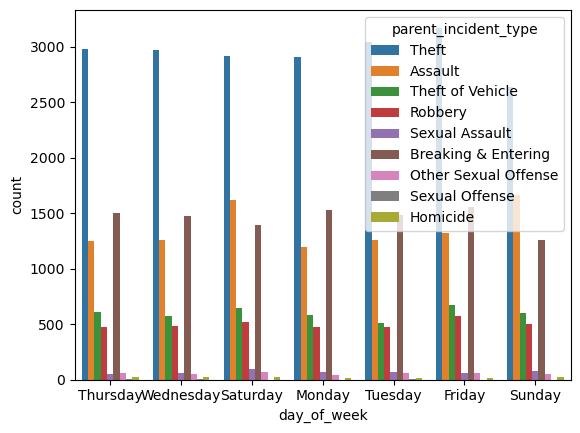

In [26]:
sns.countplot(data=CrimeIncidents_2, x="day_of_week", hue="parent_incident_type")

Theft appears to be slightly higher on Fridays while much lower on Sundays throughout 2022. Similar occurence differences in the days can be seen for the other crime types as well

Main visual I want to take a look into is how the 311 requests and Crime Incident reports vary while looking at heat maps

To do this I'm creating new dataframes of only the reasons/crimes. the lats and longs, and the counts of each grouped so that i can showcase this in a geo map visual

In [32]:
Lat_Long = ServiceRequests_2.groupby(['reason','latitude','longitude']).size().reset_index(name='count')
type(Lat_Long)

pandas.core.frame.DataFrame

In [33]:
Lat_Long.head()

reason            latitude           longitude  count
0  Engineering - Street Repairs    42.8320101367832   -78.8153855644631      1
1  Engineering - Street Repairs  42.832251803962805   -78.8245402723303      1
2  Engineering - Street Repairs  42.833126125784375  -78.85289750100402      1
3  Engineering - Street Repairs  42.833517959103396  -78.81024635872814      1
4  Engineering - Street Repairs   42.83364732511969  -78.82569341906186      1

In [37]:
Lat_Long['latitude'] = Lat_Long['latitude'].astype(float)
Lat_Long['longitude'] = Lat_Long['longitude'].astype(float)

In [38]:
Lat_Long.head()

reason   latitude  longitude  count
0  Engineering - Street Repairs  42.832010 -78.815386      1
1  Engineering - Street Repairs  42.832252 -78.824540      1
2  Engineering - Street Repairs  42.833126 -78.852898      1
3  Engineering - Street Repairs  42.833518 -78.810246      1
4  Engineering - Street Repairs  42.833647 -78.825693      1

In [43]:
import plotly.express as px
df = Lat_Long
fig = px.scatter_mapbox(df, lat="latitude", lon="longitude", color="reason", size="count",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=40, zoom=10,
                  mapbox_style="stamen-toner")
fig.show()

Keeping in mind that the highest percentage of requests is made up of Sanitation (yellow) Streets (purple) Housing (light purple), we can see here that the highest concentration of these requests appear to occur mostly in the Elmwood and East Side areas.

Now Let's take a look at the total crime counts by area to see if we find a similar distribution of crime rates in the same areas that there are more frequent 311 requests

In [44]:
Lat_Long_Crime = CrimeIncidents_2.groupby(['parent_incident_type','latitude','longitude']).size().reset_index(name='count')
type(Lat_Long)

pandas.core.frame.DataFrame

In [45]:
Lat_Long_Crime.head()

parent_incident_type latitude longitude  count
0              Assault   42.828   -78.824      1
1              Assault   42.829   -78.824      1
2              Assault   42.831   -78.849      3
3              Assault   42.832   -78.801      1
4              Assault   42.832   -78.806      1

In [46]:
Lat_Long_Crime['latitude'] = Lat_Long_Crime['latitude'].astype(float)
Lat_Long_Crime['longitude'] = Lat_Long_Crime['longitude'].astype(float)

In [49]:
df2 = Lat_Long_Crime
fig = px.scatter_mapbox(df2, lat="latitude", lon="longitude", color="parent_incident_type", size="count",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=10, zoom=10,
                  mapbox_style="stamen-toner")
fig.show()

Based on this view it appears that the majority of crimes, which already is over 40% theft related, primarily takes place in Downtown and North Buffalo. Which debunks my theory that there would be higher rates of 311 requests in areas that also have higher rates of crime.